# PyFAANG Stock Analysis

Summary:

Based solely on the analysis of prices and trading volume, the FAANG companies (Meta, Apple, Amazon, Netflix, and Google) demonstrate a consistent increase in stock prices, making them attractive investment options. Among these companies, Apple, Google, and Amazon exhibit relatively stable and consistent price trends, suggesting a more stable investment choice. On the other hand, Netflix and Meta stocks show higher volatility, presenting potential opportunities for higher returns for those willing to take on greater risk. Overall, investing in FAANG companies offers the potential for long-term growth, with varying levels of risk and potential rewards depending on individual investment preferences.

In [1]:
%matplotlib inline

In [57]:
import pandas as pd #data processing
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import requests 
from config import api_key
import yahoo_fin.stock_info as si #data fetch
import warnings

In [3]:
warnings.filterwarnings("ignore")

## Gathering the data of FAANG companies

In [4]:
sp500_tickers = si.tickers_sp500()

faang_tickers=['META', 'AMZN', 'AAPL', 'NFLX', 'GOOG']

faang_data={}

for ticker in sp500_tickers:
    if ticker in faang_tickers:
        faang_data[ticker]= si.get_data(ticker, start_date="05/31/2012", end_date="12/31/2022", interval="1mo")
        
prices= pd.concat(faang_data.values())
prices= prices[['ticker', 'open','high','low', 'close', 'adjclose','volume']]
prices.head()

,ticker,open,high,low,close,adjclose,volume
2012-06-01,AAPL,20.327143,21.071428,19.589287,20.857143,17.727377,7855825600
2012-07-01,AAPL,20.883215,22.138214,20.357143,21.812857,18.539679,8909650400
2012-08-01,AAPL,21.996786,24.316786,21.437500,23.758572,20.193424,8276206400
2012-09-01,AAPL,23.777143,25.181070,23.428572,23.825001,20.336830,9199005200
2012-10-01,AAPL,23.969999,24.169643,20.989286,21.261429,18.148584,12142830000


In [5]:
prices.tail()

,ticker,open,high,low,close,adjclose,volume
2022-08-01,NFLX,223.100006,251.990005,218.740005,223.559998,223.559998,152258300
2022-09-01,NFLX,220.720001,250.490005,214.690002,235.440002,235.440002,233920700
2022-10-01,NFLX,237.850006,305.630005,211.729996,291.880005,291.880005,335263800
2022-11-01,NFLX,296.170013,312.709991,252.089996,305.529999,305.529999,185683000
2022-12-01,NFLX,303.989990,332.720001,273.410004,294.880005,294.880005,193080900


In [6]:
prices.describe()

,open,high,low,close,adjclose,volume
count,635.000000,635.000000,635.000000,635.000000,635.000000,6.350000e+02
mean,112.059653,121.094384,103.603549,112.787088,112.372109,1.492486e+09
std,116.612935,125.904588,106.859508,116.179041,116.403726,1.804184e+09
min,7.800000,8.774286,7.544286,7.777143,7.777143,5.474770e+07
25%,30.681429,33.321251,29.082857,31.194000,30.644072,4.698852e+08
50%,70.570000,76.434998,64.092499,72.650002,72.366997,8.741525e+08
75%,151.620003,163.732254,138.496498,151.220001,150.614998,1.814250e+09
max,689.059998,700.989990,640.010010,690.309998,690.309998,1.312342e+10


In [7]:
prices.shape

(635, 7)

In [8]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 635 entries, 2012-06-01 to 2022-12-01
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ticker    635 non-null    object 
 1   open      635 non-null    float64
 2   high      635 non-null    float64
 3   low       635 non-null    float64
 4   close     635 non-null    float64
 5   adjclose  635 non-null    float64
 6   volume    635 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 39.7+ KB


The available data covers a 10-year period on a monthly interval, starting from June 1, 2012. It should be noted that the time period is decided based on the IPO of Meta in May 2012.
- Open and Close represent opening and closing prices of the stock per month.
- High and Low represent the highest/lowest price of the stock during that month.
- Adjclose represent close price that account for events such as stock splits, dividends, or other corporate actions that may affect the stock's price.
- Volume is the number of stocks traded that month.

## Analyzing Stock Price Trends and Trading Volumes of FAANG Companies

In [9]:
prices['ticker'].value_counts()

AAPL    127
AMZN    127
GOOG    127
META    127
NFLX    127
Name: ticker, dtype: int64

Presenting 127 data points per stock for stock price trends and trading volumes using an equal amount of data for each FAANG company.

In [10]:
meta= prices[prices['ticker']=='META']
apple= prices[prices['ticker']=='AAPL']
amazon= prices[prices['ticker']=='AMZN']
netflix= prices[prices['ticker']=='NFLX']
google= prices[prices['ticker']=='GOOG']

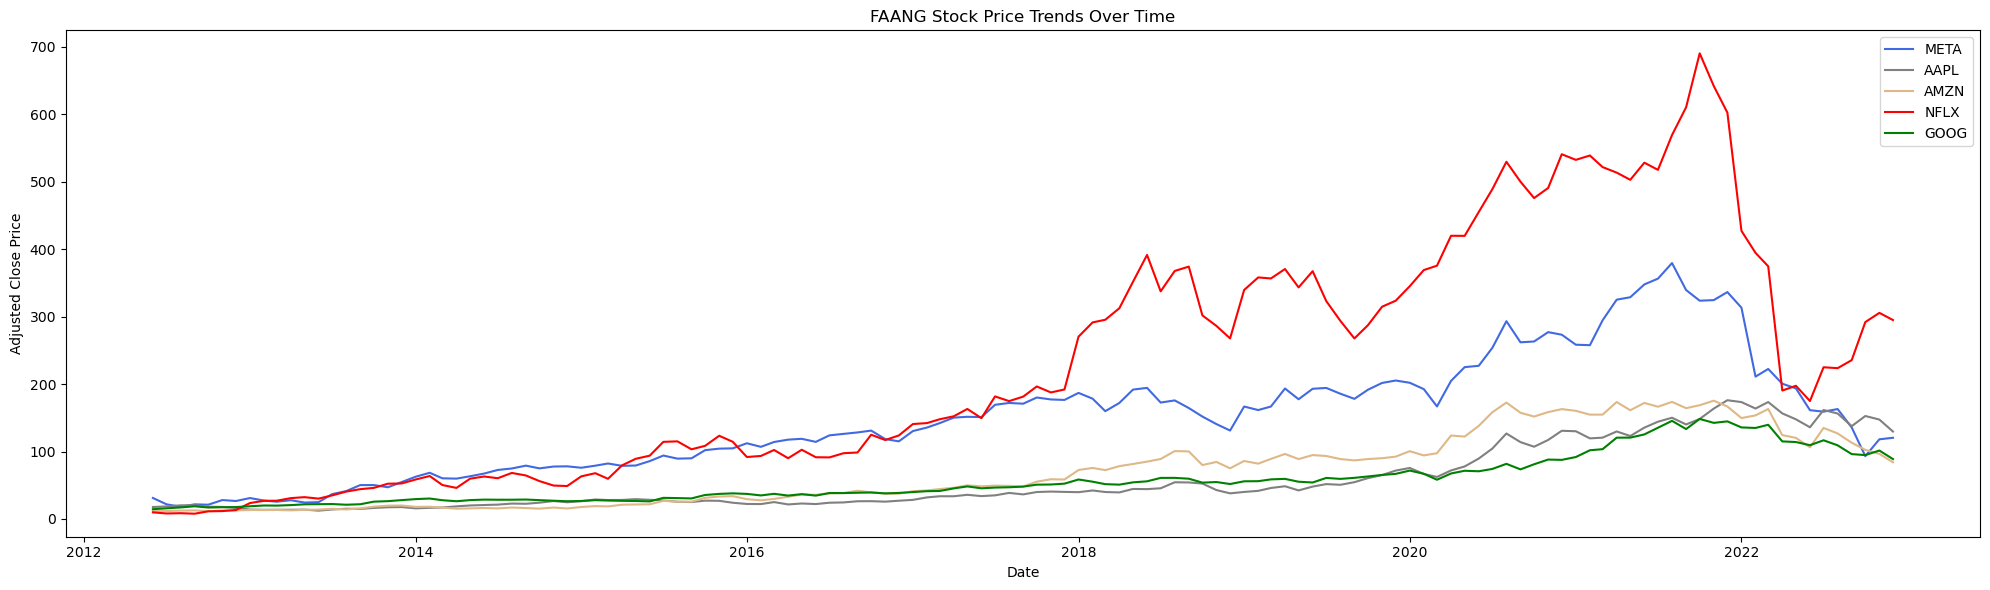

In [11]:
# plot price trends
fig, ax = plt.subplots(figsize=(20, 6))

ax.plot(meta.index, meta['adjclose'], label='META', color='royalblue')
ax.plot(apple.index, apple['adjclose'], label='AAPL', color='grey')
ax.plot(amazon.index, amazon['adjclose'], label='AMZN', color='burlywood')
ax.plot(netflix.index, netflix['adjclose'], label='NFLX', color='red')
ax.plot(google.index, google['adjclose'], label='GOOG', color='green')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted Close Price')
ax.set_title('FAANG Stock Price Trends Over Time')

plt.legend()
plt.tight_layout()
plt.show()

The trend for FAANG companies shows a consistent increase in stock prices over the analyzed period.

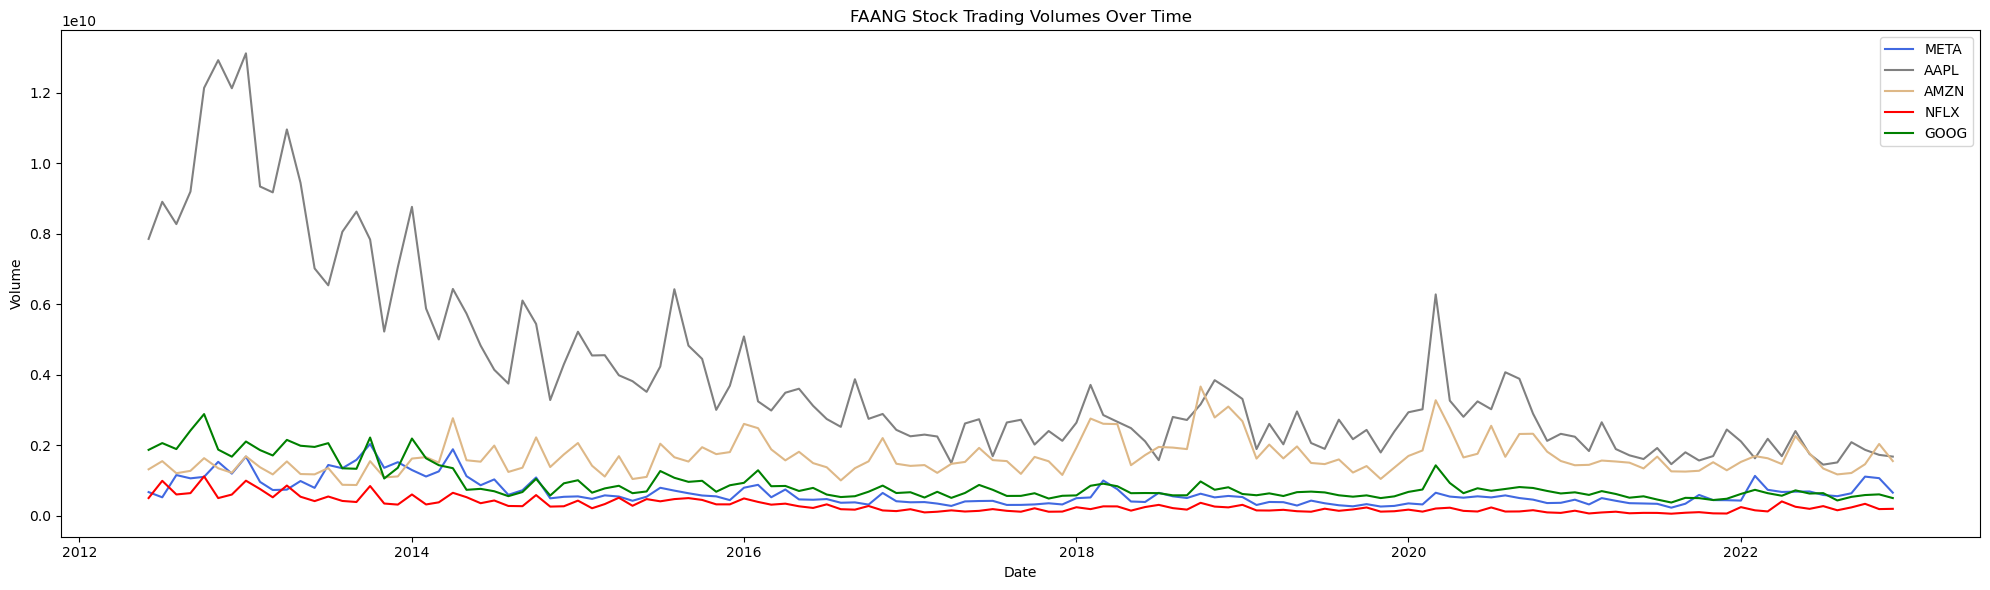

In [12]:
# plot trading volumes
fig, ax = plt.subplots(figsize=(20, 6))

ax.plot(meta.index, meta['volume'], label='META', color='royalblue')
ax.plot(apple.index, apple['volume'], label='AAPL', color='grey')
ax.plot(amazon.index, amazon['volume'], label='AMZN', color='burlywood')
ax.plot(netflix.index, netflix['volume'], label='NFLX', color='red')
ax.plot(google.index, google['volume'], label='GOOG', color='green')

ax.set_xlabel('Date')
ax.set_ylabel('Volume')
ax.set_title('FAANG Stock Trading Volumes Over Time')

plt.legend()
plt.tight_layout()
plt.show()

Overall, there was a decrease in the trading volume trend. However, in the years of 2018 and 2020, there was a notable increase in trading volumes.

#####  Yearly Analysis of Trading Volume

Text(0.5, 1.0, 'Yearly Trading Volume of Meta Stocks')

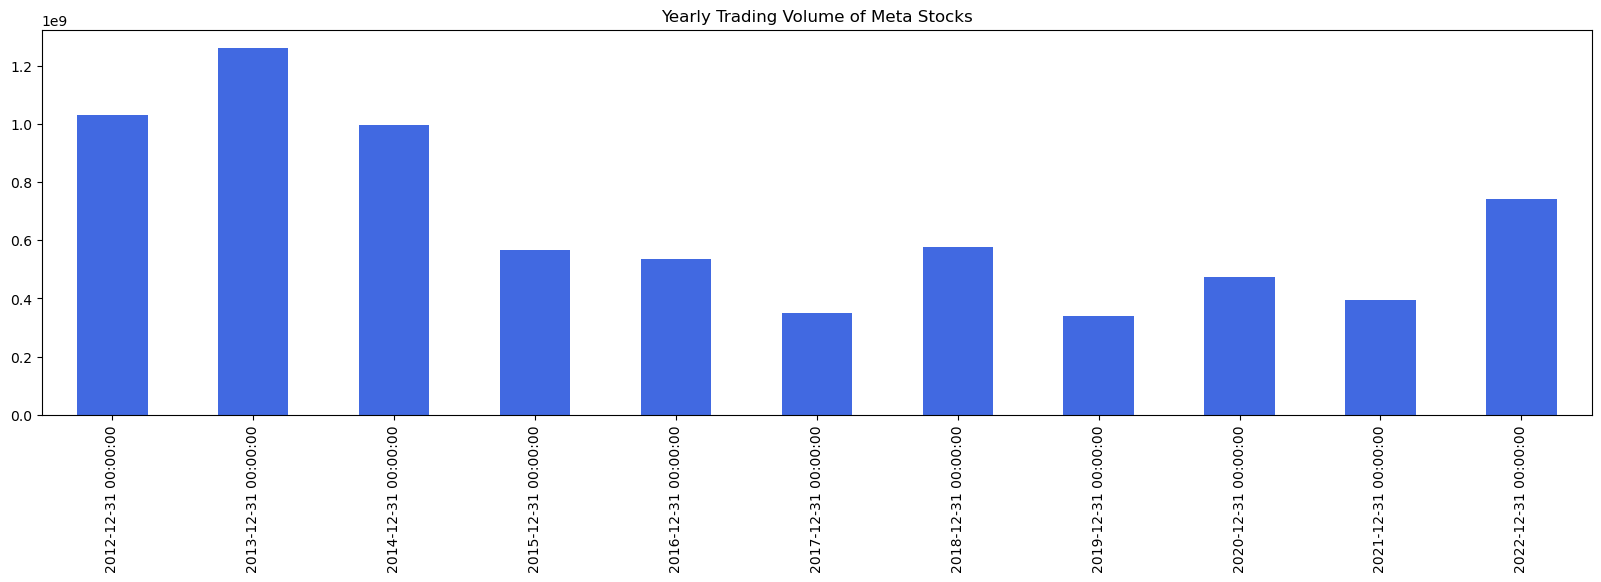

In [13]:
plt.figure(figsize=(20,5))
meta['volume'].resample('Y').mean().plot.bar(color='royalblue')
plt.title("Yearly Trading Volume of Meta Stocks")

Text(0.5, 1.0, 'Yearly Trading Volume of Apple Stocks')

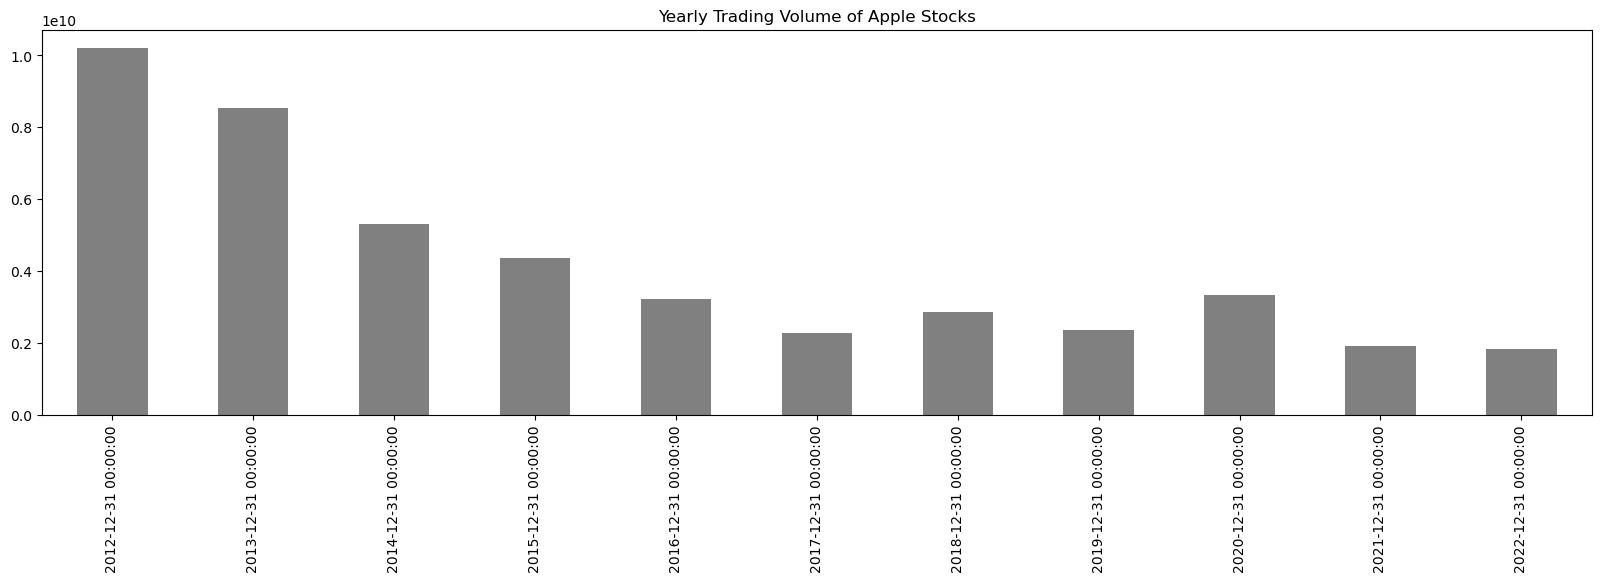

In [14]:
plt.figure(figsize=(20,5))
apple['volume'].resample('Y').mean().plot.bar(color='grey')
plt.title("Yearly Trading Volume of Apple Stocks")

Text(0.5, 1.0, 'Yearly Trading Volume of Amazon Stocks')

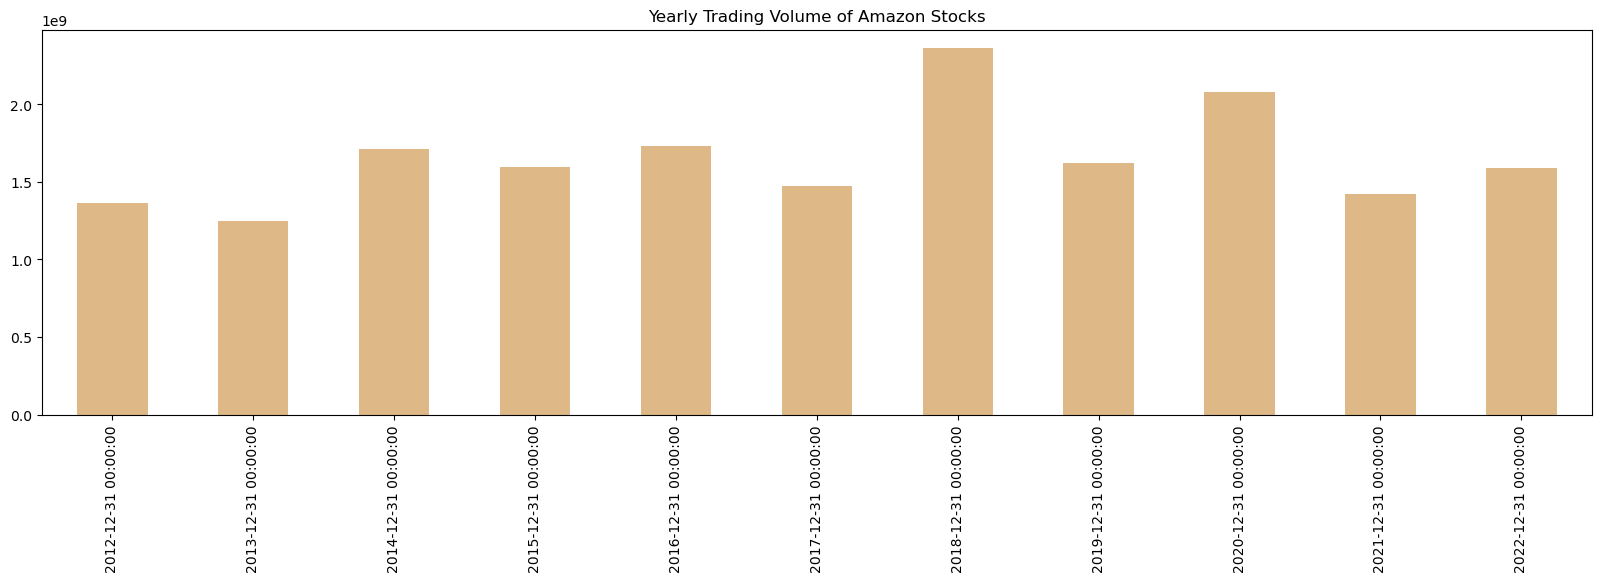

In [15]:
plt.figure(figsize=(20,5))
amazon['volume'].resample('Y').mean().plot.bar(color='burlywood')
plt.title("Yearly Trading Volume of Amazon Stocks")

Text(0.5, 1.0, 'Yearly Trading Volume of Netflix Stocks')

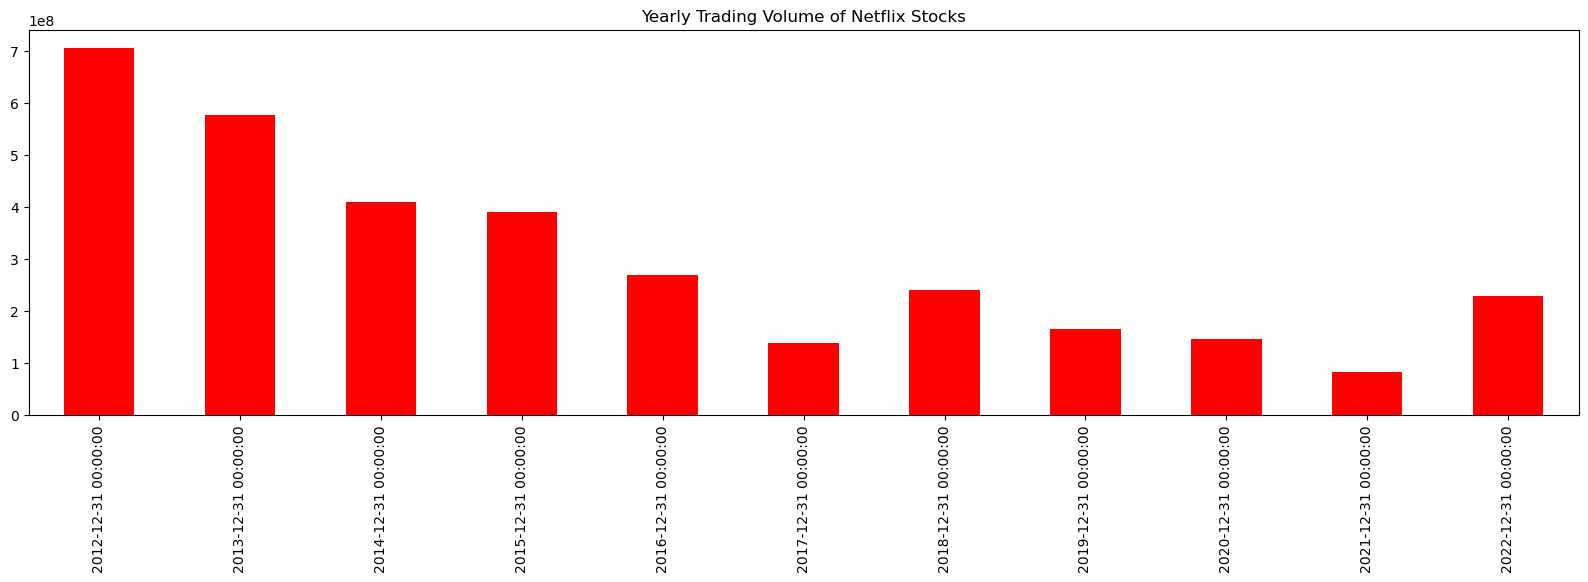

In [16]:
plt.figure(figsize=(20,5))
netflix['volume'].resample('Y').mean().plot.bar(color='red')
plt.title("Yearly Trading Volume of Netflix Stocks")

Text(0.5, 1.0, 'Yearly Trading Volume of Google Stocks')

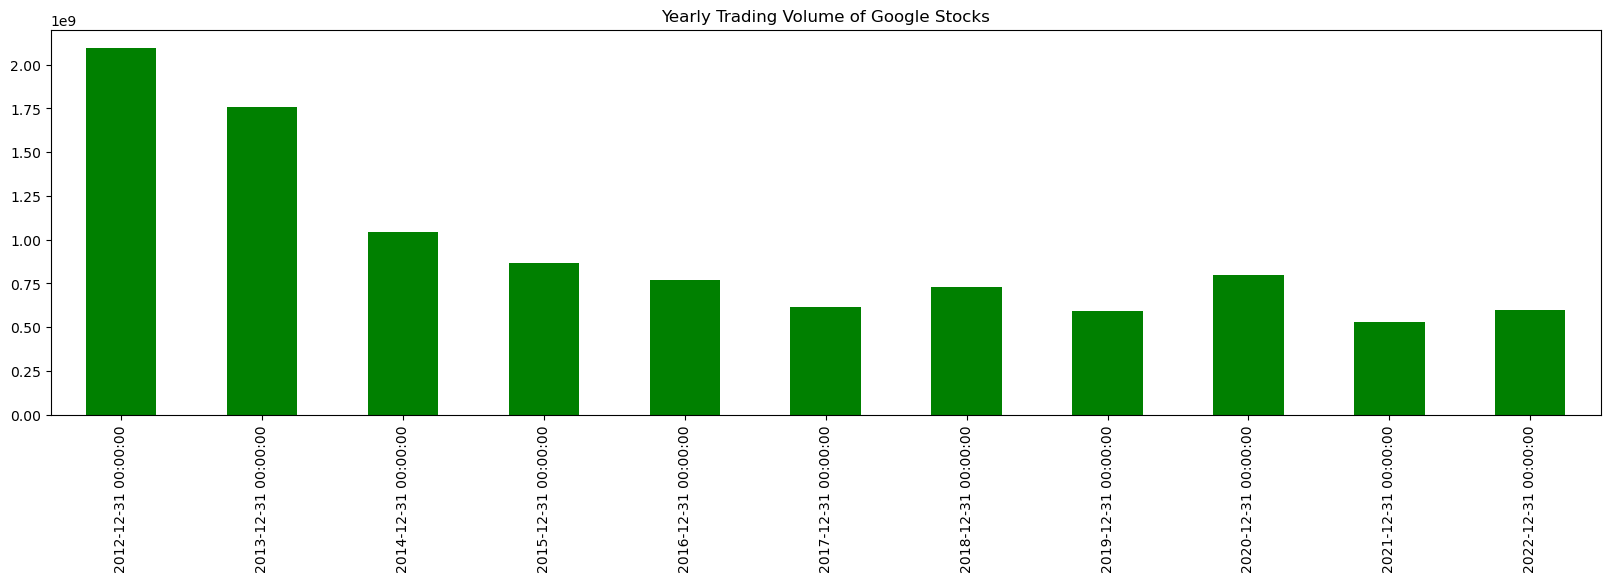

In [17]:
plt.figure(figsize=(20,5))
google['volume'].resample('Y').mean().plot.bar(color='green')
plt.title("Yearly Trading Volume of Google Stocks")

The general trend shows increasing stock prices alongside decreasing trading volumes, indicating that more people were holding onto their stocks, with exceptions observed in 2018 and 2020.

From 2012 to 2022, the dataset reveals a pattern where the FAANG stock prices were increasing while the trading volumes were decreasing before 2020, suggesting a potential "reduction of market participation" and a potential indication of a price reversal. Now, let's dive deeper into the dataset to examine the dynamics of the FAANG stocks during the pandemic.

## The Impact of COVID on the Stock Performance of FAANG Companies

Taking a closer look at the FAANG stocks during the pandemic.

In [18]:
sp500_tickers = si.tickers_sp500()

faang_tickers=['META', 'AMZN', 'AAPL', 'NFLX', 'GOOG']

covid_data={}

for ticker in sp500_tickers:
    if ticker in faang_tickers:
        covid_data[ticker]= si.get_data(ticker, start_date="03/11/2020", end_date="09/13/2022", interval="1d")
        
covid_prices= pd.concat(covid_data.values())
covid_prices= covid_prices[['ticker', 'open','high','low', 'close', 'adjclose','volume']]
covid_prices.head()

,ticker,open,high,low,close,adjclose,volume
2020-03-11,AAPL,69.347504,70.305000,67.964996,68.857498,67.421898,255598800
2020-03-12,AAPL,63.985001,67.500000,62.000000,62.057499,60.763672,418474000
2020-03-13,AAPL,66.222504,69.980003,63.237499,69.492500,68.043663,370732000
2020-03-16,AAPL,60.487499,64.769997,60.000000,60.552502,59.290051,322423600
2020-03-17,AAPL,61.877499,64.402496,59.599998,63.215000,61.897038,324056000


In [19]:
covid_prices.tail()

,ticker,open,high,low,close,adjclose,volume
2022-09-06,NFLX,225.589996,226.850006,214.690002,218.389999,218.389999,7469000
2022-09-07,NFLX,220.210007,229.330002,218.270004,228.960007,228.960007,8149300
2022-09-08,NFLX,224.160004,228.740005,221.300003,227.440002,227.440002,6737400
2022-09-09,NFLX,229.619995,234.779999,229.619995,233.570007,233.570007,6699600
2022-09-12,NFLX,233.610001,239.490005,233.369995,236.529999,236.529999,6047400


In [20]:
covid_prices.describe()

,open,high,low,close,adjclose,volume
count,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3.160000e+03
mean,221.898361,225.058904,218.674303,221.896246,221.599586,5.052979e+07
std,145.338619,147.321761,143.131144,145.226423,145.414738,4.930156e+07
min,52.825500,53.566002,50.676800,52.831001,52.831001,1.144000e+06
25%,126.557499,127.985001,125.400002,126.716623,125.967054,1.579385e+07
50%,161.679993,164.149994,159.620003,161.784996,161.541023,3.213645e+07
75%,277.232498,280.120003,272.545006,276.955009,276.955009,7.485090e+07
max,692.349976,700.989990,686.090027,691.690002,691.690002,4.184740e+08


In [21]:
covid_prices.shape

(3160, 7)

In [22]:
covid_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3160 entries, 2020-03-11 to 2022-09-12
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ticker    3160 non-null   object 
 1   open      3160 non-null   float64
 2   high      3160 non-null   float64
 3   low       3160 non-null   float64
 4   close     3160 non-null   float64
 5   adjclose  3160 non-null   float64
 6   volume    3160 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 197.5+ KB


The COVID period from March 11, 2020, to September 12, 2022, is represented using daily intervals to analyze the FAANG stock prices.

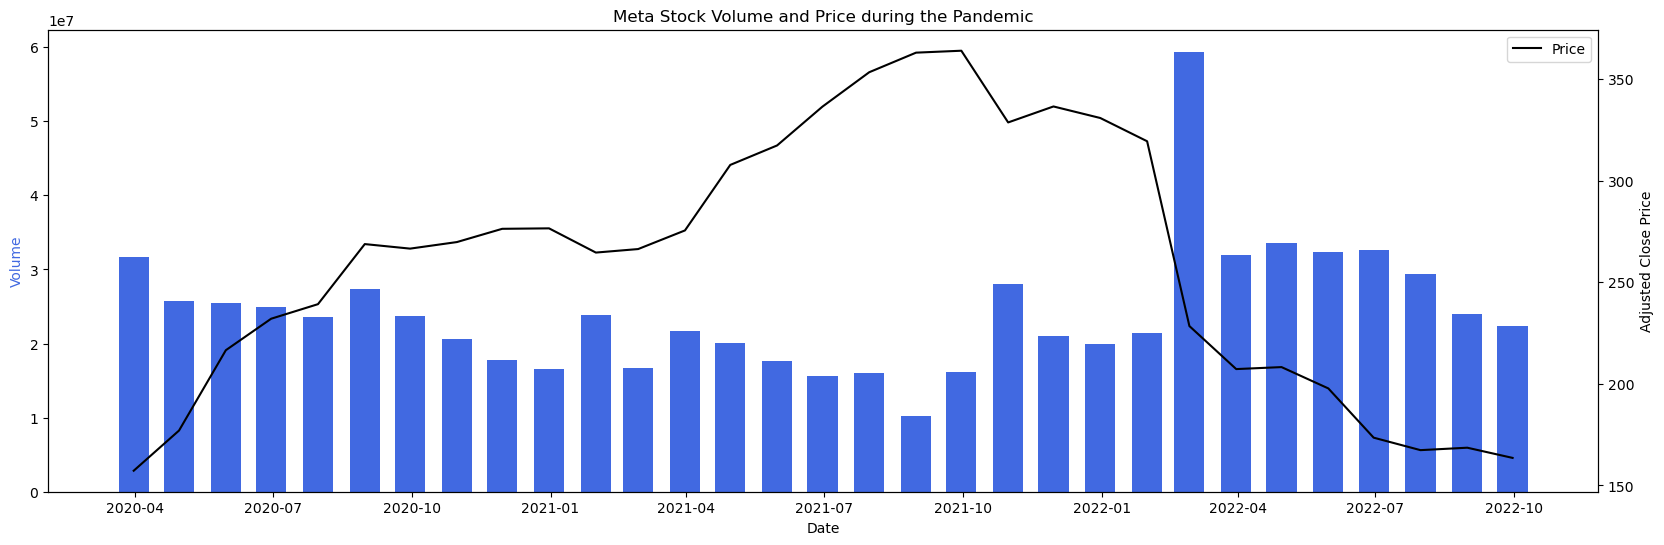

In [23]:
meta_covid = covid_prices[covid_prices['ticker'] == 'META']
x_values = meta_covid.resample("M").mean().index
y_values_bar = meta_covid['volume'].resample("M").mean()
y_values_line = meta_covid['adjclose'].resample("M").mean()

f, ax1 = plt.subplots(figsize=(20, 6))
ax1.bar(x_values, y_values_bar, color='royalblue', width=20)
ax1.set_ylabel('Volume', color='royalblue')

ax2 = ax1.twinx()
ax2.plot(x_values, y_values_line, color='black', label= 'Price')
ax2.set_ylabel('Adjusted Close Price', color='black')

ax1.set_xlabel('Date')
plt.title('Meta Stock Volume and Price during the Pandemic')

plt.legend()
plt.show()

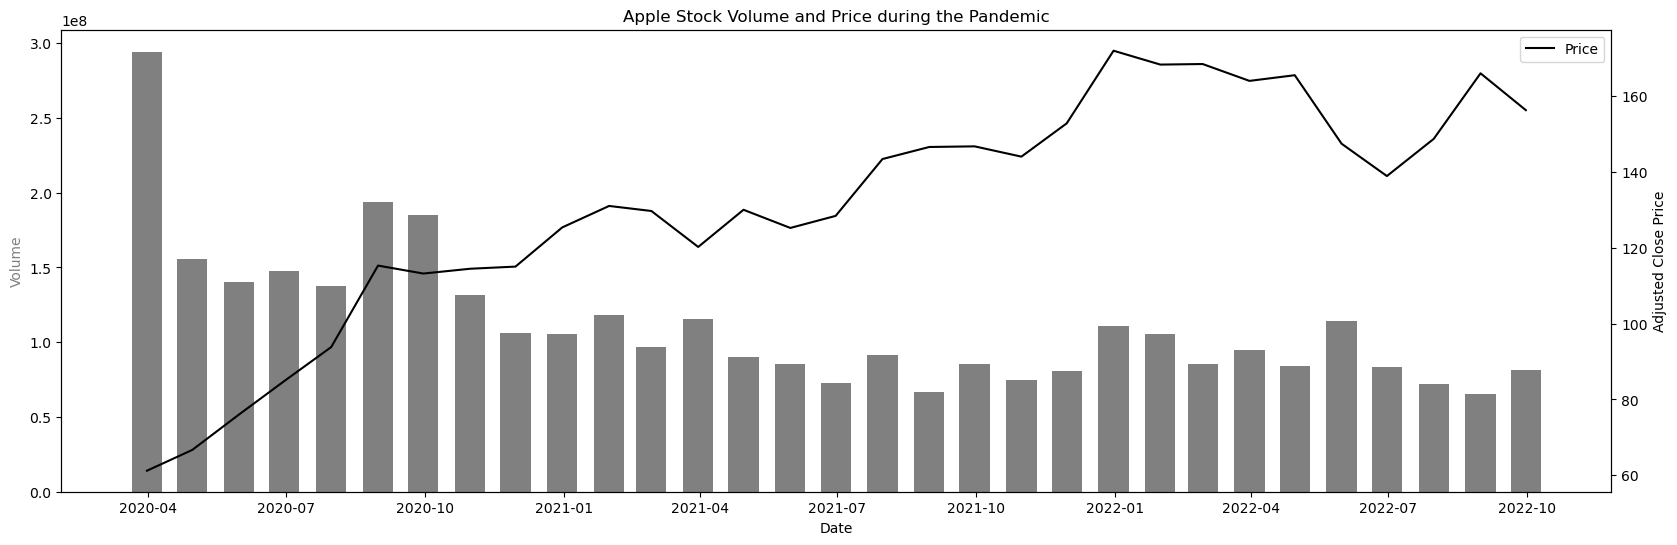

In [24]:
apple_covid = covid_prices[covid_prices['ticker'] == 'AAPL']
x_values = apple_covid.resample("M").mean().index
y_values_bar = apple_covid['volume'].resample("M").mean()
y_values_line = apple_covid['adjclose'].resample("M").mean()

f, ax1 = plt.subplots(figsize=(20, 6))
ax1.bar(x_values, y_values_bar, color='grey', width=20)
ax1.set_ylabel('Volume', color='grey')

ax2 = ax1.twinx()
ax2.plot(x_values, y_values_line, color='black', label= 'Price')
ax2.set_ylabel('Adjusted Close Price', color='black')

ax1.set_xlabel('Date')
plt.title('Apple Stock Volume and Price during the Pandemic')

plt.legend()
plt.show()

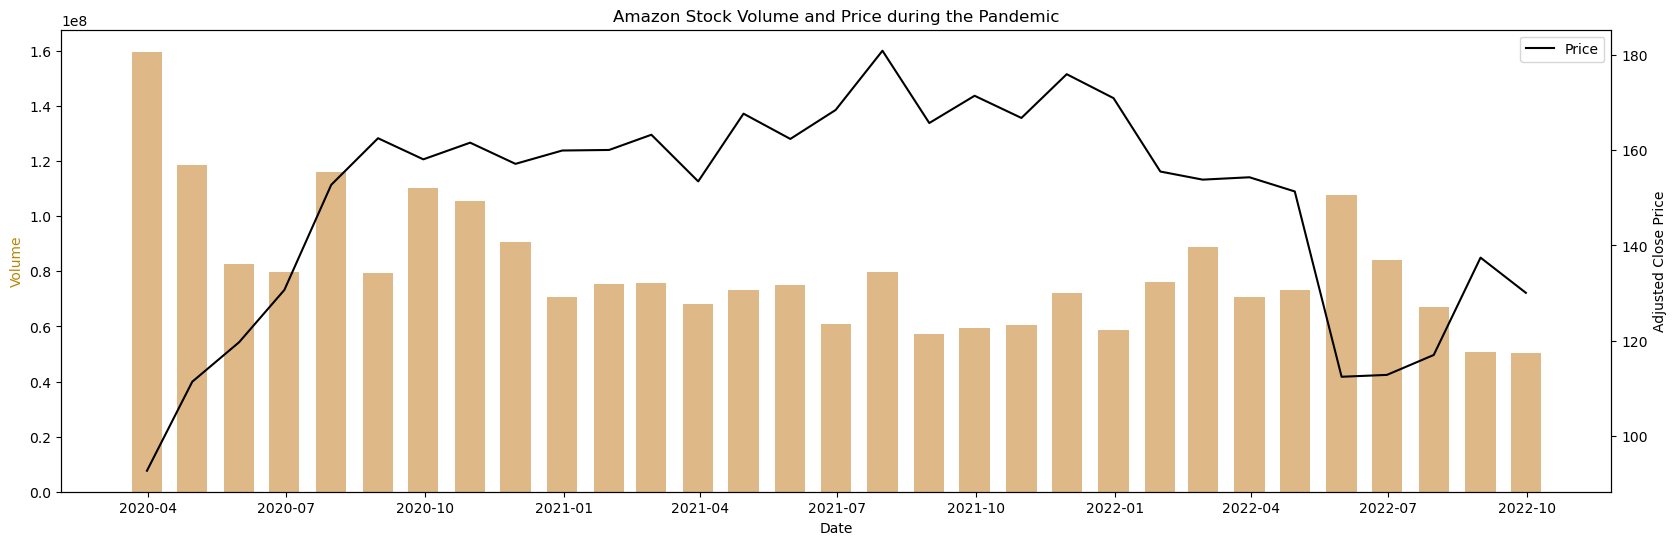

In [25]:
amazon_covid = covid_prices[covid_prices['ticker'] == 'AMZN']
x_values = amazon_covid.resample("M").mean().index
y_values_bar = amazon_covid['volume'].resample("M").mean()
y_values_line = amazon_covid['adjclose'].resample("M").mean()

f, ax1 = plt.subplots(figsize=(20, 6))
ax1.bar(x_values, y_values_bar, color='burlywood', width=20)
ax1.set_ylabel('Volume', color='darkgoldenrod')

ax2 = ax1.twinx()
ax2.plot(x_values, y_values_line, color='black', label= 'Price')
ax2.set_ylabel('Adjusted Close Price', color='black')

ax1.set_xlabel('Date')
plt.title('Amazon Stock Volume and Price during the Pandemic')

plt.legend()
plt.show()

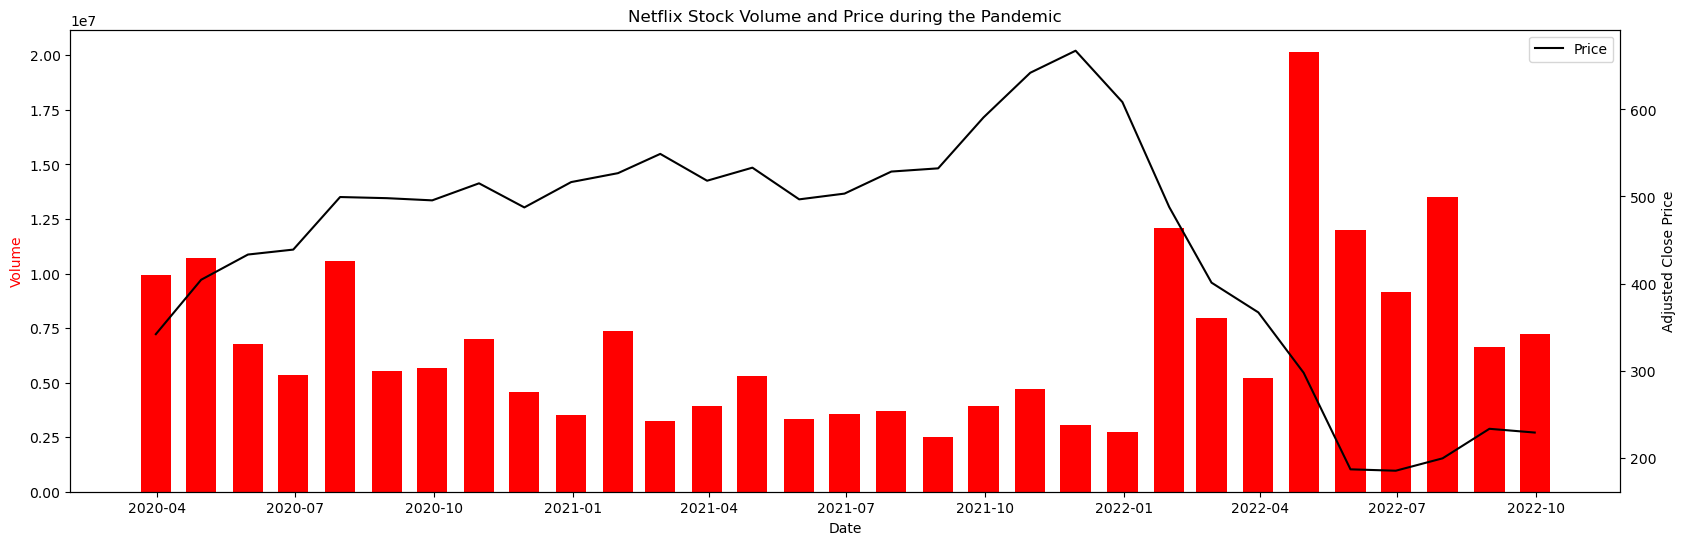

In [26]:
netflix_covid = covid_prices[covid_prices['ticker'] == 'NFLX']
x_values = netflix_covid.resample("M").mean().index
y_values_bar = netflix_covid['volume'].resample("M").mean()
y_values_line = netflix_covid['adjclose'].resample("M").mean()

f, ax1 = plt.subplots(figsize=(20, 6))
ax1.bar(x_values, y_values_bar, color='red', width=20)
ax1.set_ylabel('Volume', color='red')

ax2 = ax1.twinx()
ax2.plot(x_values, y_values_line, color='black', label= 'Price')
ax2.set_ylabel('Adjusted Close Price', color='black')

ax1.set_xlabel('Date')
plt.title('Netflix Stock Volume and Price during the Pandemic')

plt.legend()
plt.show()

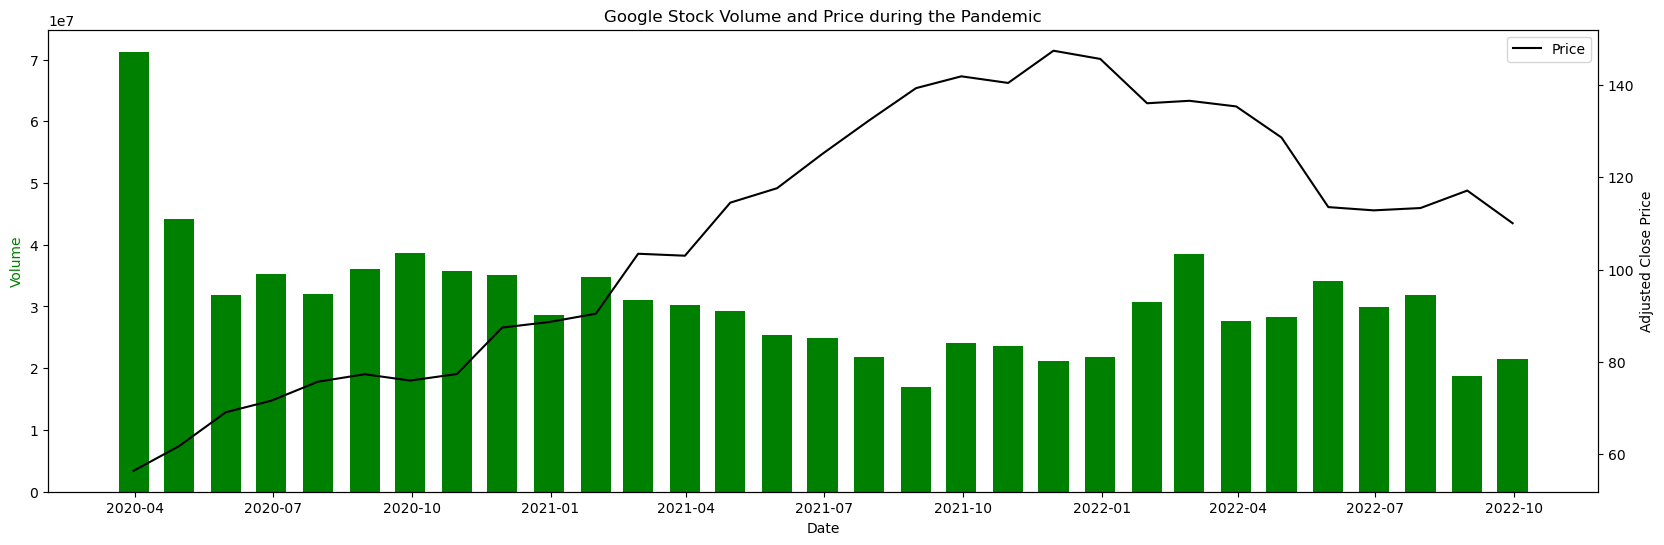

In [27]:
google_covid = covid_prices[covid_prices['ticker'] == 'GOOG']
x_values = google_covid.resample("M").mean().index
y_values_bar = google_covid['volume'].resample("M").mean()
y_values_line = google_covid['adjclose'].resample("M").mean()

f, ax1 = plt.subplots(figsize=(20, 6))
ax1.bar(x_values, y_values_bar, color='green', width=20)
ax1.set_ylabel('Volume', color='green')

ax2 = ax1.twinx()
ax2.plot(x_values, y_values_line, color='black', label= 'Price')
ax2.set_ylabel('Adjusted Close Price', color='black')

ax1.set_xlabel('Date')
plt.title('Google Stock Volume and Price during the Pandemic')

plt.legend()
plt.show()

During the initial phase of the COVID-19 pandemic, the stock prices of FAANG companies experienced a significant decline while trading volumes increased. This suggested that many investors were selling their stocks, potentially due to the impact of the pandemic. However, Netflix seemed to be an exception, as it was perceived as a beneficiary of the lockdown measures, resulting in relatively stable performance.

As time passed, the stock prices of FAANG companies gradually rebounded, demonstrating their ability to recover from the initial impact of the pandemic. This, coupled with the decrease in trading volumes, indicates that investors retained confidence in the long-term prospects and stability of FAANG companies.

##### Retrieve the number of outstanding shares to calculate the market capitalization of FAANG companies.

In [28]:
faang_tickers=['META', 'AMZN', 'AAPL', 'NFLX', 'GOOG']
fanng_shares={}
for ticker in faang_tickers:
    url = f"https://www.alphavantage.co/query?function=BALANCE_SHEET&symbol={ticker}&apikey={api_key}"
    response = requests.get(url)
    data = response.json()
    shares_dec_2022= data['quarterlyReports'][1]['commonStockSharesOutstanding']
    shares_mar_2020= data['quarterlyReports'][12]['commonStockSharesOutstanding']
    shares_dec_2019= data['quarterlyReports'][13]['commonStockSharesOutstanding']
    fanng_shares.setdefault(ticker,{'shares_dec_2019':shares_dec_2019, 'shares_mar_2020':shares_mar_2020, 'shares_dec_2022':shares_dec_2022})

In [29]:
shares_data = []
for ticker, shares in fanng_shares.items():
    shares_data.append({
        'ticker': ticker,
        'shares dec 2019': shares['shares_dec_2019'],
        'shares mar 2020': shares['shares_mar_2020'],
        'shares dec 2022': shares['shares_dec_2022']})

shares= pd.DataFrame(shares_data)
shares

,ticker,shares dec 2019,shares mar 2020,shares dec 2022
0,META,2851000000,2851000000,2639000000
1,AMZN,498000000,499000000,10242000000
2,AAPL,4384959000,4323987000,15842407000
3,NFLX,438806649,439780618,445346776
4,GOOG,688335000,683972000,12849000000


In [30]:
shares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ticker           5 non-null      object
 1   shares dec 2019  5 non-null      object
 2   shares mar 2020  5 non-null      object
 3   shares dec 2022  5 non-null      object
dtypes: object(4)
memory usage: 288.0+ bytes


In [31]:
shares['shares dec 2019']= shares['shares dec 2019'].astype(int)
shares['shares mar 2020']= shares['shares mar 2020'].astype(int)
shares['shares dec 2022']= shares['shares dec 2022'].astype(int)

The outstanding share data from December 2019, March 2020, and December 2022 represents the pre-pandemic, pandemic, and post-pandemic periods, respectively.

##### Dec 2019 Data

In [32]:
sp500_tickers = si.tickers_sp500()

faang_tickers=['META', 'AMZN', 'AAPL', 'NFLX', 'GOOG']

dec_2019_prices={}

for ticker in sp500_tickers:
    if ticker in faang_tickers:
        dec_2019_prices[ticker]= si.get_data(ticker, start_date="12/31/2019", end_date="01/01/2020", interval="1d")
dec_2019= pd.concat(dec_2019_prices.values())
dec_2019

,open,high,low,close,adjclose,volume,ticker
2019-12-31,72.482498,73.419998,72.379997,73.412498,71.711731,100805600,AAPL
2019-12-31,92.099998,92.663002,91.611504,92.391998,92.391998,50130000,AMZN
2019-12-31,66.505501,66.900002,66.454247,66.850998,66.850998,19236000,GOOG
2019-12-31,204.000000,205.559998,203.600006,205.250000,205.250000,8953500,META
2019-12-31,322.000000,324.920013,321.089996,323.570007,323.570007,3713300,NFLX


In [33]:
dec_2019= shares[['ticker', 'shares dec 2019']].merge(dec_2019, on= 'ticker')

In [34]:
dec_2019['market cap (billions)']= (dec_2019['adjclose'].mul(dec_2019['shares dec 2019'])).div(1000000000).round(3)

dec_2019

,ticker,shares dec 2019,open,high,low,close,adjclose,volume,market cap (billions)
0,META,2851000000,204.000000,205.559998,203.600006,205.250000,205.250000,8953500,585.168
1,AMZN,498000000,92.099998,92.663002,91.611504,92.391998,92.391998,50130000,46.011
2,AAPL,4384959000,72.482498,73.419998,72.379997,73.412498,71.711731,100805600,314.453
3,NFLX,438806649,322.000000,324.920013,321.089996,323.570007,323.570007,3713300,141.985
4,GOOG,688335000,66.505501,66.900002,66.454247,66.850998,66.850998,19236000,46.016


##### Mar 2020 Data

In [35]:
#  March 2020 Data
sp500_tickers = si.tickers_sp500()

faang_tickers=['META', 'AMZN', 'AAPL', 'NFLX', 'GOOG']

mar_2020_prices={}

for ticker in sp500_tickers:
    if ticker in faang_tickers:
        mar_2020_prices[ticker]= si.get_data(ticker, start_date="03/31/2020", end_date="04/01/2020", interval="1d")
mar_2020= pd.concat(mar_2020_prices.values())
mar_2020

,open,high,low,close,adjclose,volume,ticker
2020-03-31,63.900002,65.622498,63.000000,63.572498,62.247089,197002000,AAPL
2020-03-31,98.217499,99.651001,97.200500,97.486000,97.486000,102472000,AMZN
2020-03-31,57.365002,58.765499,56.907001,58.140499,58.140499,49728000,GOOG
2020-03-31,165.479996,170.929993,164.199997,166.800003,166.800003,23676300,META
2020-03-31,367.929993,383.010010,366.440002,375.500000,375.500000,9366500,NFLX


In [37]:
mar_2020= shares[['ticker', 'shares mar 2020']].merge(mar_2020, on= 'ticker')

In [38]:
mar_2020['market cap (billions)']= (mar_2020['adjclose'].mul(mar_2020['shares mar 2020'])).div(1000000000).round(3)

mar_2020

,ticker,shares mar 2020,open,high,low,close,adjclose,volume,market cap (billions)
0,META,2851000000,165.479996,170.929993,164.199997,166.800003,166.800003,23676300,475.547
1,AMZN,499000000,98.217499,99.651001,97.200500,97.486000,97.486000,102472000,48.646
2,AAPL,4323987000,63.900002,65.622498,63.000000,63.572498,62.247089,197002000,269.156
3,NFLX,439780618,367.929993,383.010010,366.440002,375.500000,375.500000,9366500,165.138
4,GOOG,683972000,57.365002,58.765499,56.907001,58.140499,58.140499,49728000,39.766


##### Dec 2022 Data

In [42]:
sp500_tickers = si.tickers_sp500()

faang_tickers=['META', 'AMZN', 'AAPL', 'NFLX', 'GOOG']

dec_2022_prices={}

for ticker in sp500_tickers:
    if ticker in faang_tickers:
        dec_2022_prices[ticker]= si.get_data(ticker, start_date="12/30/2022", end_date="12/31/2022", interval="1d")
dec_2022= pd.concat(dec_2022_prices.values())
dec_2022

,open,high,low,close,adjclose,volume,ticker
2022-12-30,128.410004,129.949997,127.430000,129.929993,129.552719,77034200,AAPL
2022-12-30,83.120003,84.050003,82.470001,84.000000,84.000000,62401200,AMZN
2022-12-30,87.364998,88.830002,87.029999,88.730003,88.730003,19190300,GOOG
2022-12-30,118.160004,120.419998,117.739998,120.339996,120.339996,19583800,META
2022-12-30,285.529999,295.010010,283.220001,294.880005,294.880005,7566900,NFLX


In [43]:
dec_2022= shares[['ticker', 'shares dec 2022']].merge(dec_2022, on= 'ticker')

In [45]:
dec_2022['market cap (billions)']= (dec_2022['adjclose'].mul(dec_2022['shares dec 2022'])).div(1000000000).round(3)

dec_2022

,ticker,shares dec 2022,open,high,low,close,adjclose,volume,market cap (billions)
0,META,2639000000,118.160004,120.419998,117.739998,120.339996,120.339996,19583800,317.577
1,AMZN,10242000000,83.120003,84.050003,82.470001,84.000000,84.000000,62401200,860.328
2,AAPL,15842407000,128.410004,129.949997,127.430000,129.929993,129.552719,77034200,2052.427
3,NFLX,445346776,285.529999,295.010010,283.220001,294.880005,294.880005,7566900,131.324
4,GOOG,12849000000,87.364998,88.830002,87.029999,88.730003,88.730003,19190300,1140.092


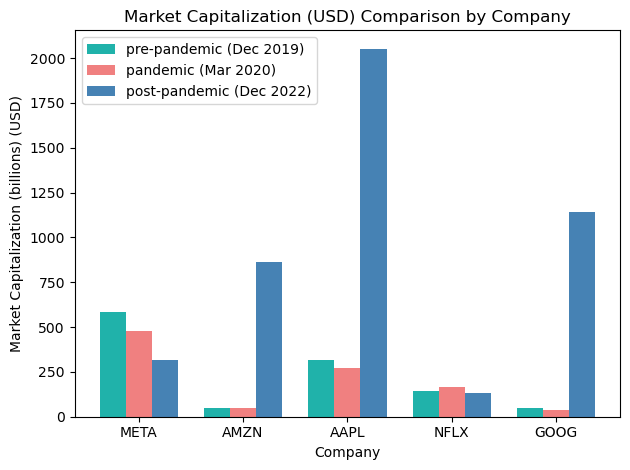

In [46]:
# plot market cap comparsions
tickers= dec_2019['ticker']
x_indexs= np.arange(len(tickers))
width= 0.25

plt.bar(x_indexs-width, dec_2019['market cap (billions)'] , width=width, color= "lightseagreen", label= "pre-pandemic (Dec 2019)")
plt.bar(x_indexs, mar_2020['market cap (billions)'] , width=width, color= "lightcoral", label= "pandemic (Mar 2020)")
plt.bar(x_indexs+width, dec_2022['market cap (billions)'] ,width=width, color= "steelblue", label= "post-pandemic (Dec 2022)")


plt.xticks(ticks= x_indexs, labels=tickers)

plt.xlabel('Company')
plt.ylabel('Market Capitalization (billions) (USD)')
plt.title('Market Capitalization (USD) Comparison by Company')

plt.legend()
plt.tight_layout()
plt.show()

During the COVID-19 pandemic, the market capitalization of the FAANG companies experienced an overall decreased compared to the pre-COVID period. However, Netflix stood out as an exception, with its market capitalization remaining relatively stable or even growing during this challenging period.

In the post-COVID era, the market capitalization of Amazon, Google, and Apple experienced substantial growth, surpassing their pre-COVID levels. This indicates a remarkable recovery and resilience of these companies in the face of adversity, demonstrating their ability to adapt and thrive in a rapidly changing business landscape.

## Comparison of S&P 500 Index vs FAANG Stocks

In [47]:
voo= si.get_data("VOO", start_date="2012-05-31", end_date="2022-12-31", interval="1mo")
voo= voo[['ticker', 'open','high','low', 'close', 'adjclose','volume']]
voo.head()

,ticker,open,high,low,close,adjclose,volume
2012-06-01,VOO,118.339996,125.300003,116.339996,124.559998,101.083015,7559800
2012-07-01,VOO,124.900002,127.459999,121.320000,126.059998,102.836525,8482850
2012-08-01,VOO,126.879997,130.940002,124.080002,129.220001,105.414360,8237950
2012-09-01,VOO,129.139999,135.580002,128.240005,131.839996,107.551682,8057100
2012-10-01,VOO,132.300003,134.720001,128.539993,129.259995,105.988686,7821650


In [48]:
voo.tail()

,ticker,open,high,low,close,adjclose,volume
2022-08-01,VOO,376.119995,396.890015,363.109985,363.149994,356.957642,82930500
2022-09-01,VOO,361.100006,378.510010,328.119995,328.299988,322.701904,110165900
2022-10-01,VOO,331.790009,357.980011,319.869995,354.950012,350.432373,99168300
2022-11-01,VOO,358.529999,374.589996,338.899994,374.489990,369.723663,78851100
2022-12-01,VOO,375.869995,377.190002,344.339996,351.339996,346.868317,94160600


In [49]:
voo.describe()

,open,high,low,close,adjclose,volume
count,127.000000,127.000000,127.000000,127.000000,127.000000,1.270000e+02
mean,243.764645,251.955118,235.143859,245.101416,225.060313,5.892448e+07
std,83.373634,86.763261,78.498952,82.669345,88.247230,4.129676e+07
min,118.339996,125.300003,116.339996,124.559998,101.083015,7.559800e+06
25%,181.919998,187.855003,176.450005,183.490005,156.408798,3.277970e+07
50%,227.300003,230.899994,220.720001,229.809998,207.525742,4.955570e+07
75%,286.699997,299.065002,281.005005,292.169998,274.787262,7.598690e+07
max,437.929993,441.260010,418.630005,436.570007,424.384552,2.817656e+08


In [50]:
voo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 127 entries, 2012-06-01 to 2022-12-01
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ticker    127 non-null    object 
 1   open      127 non-null    float64
 2   high      127 non-null    float64
 3   low       127 non-null    float64
 4   close     127 non-null    float64
 5   adjclose  127 non-null    float64
 6   volume    127 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 7.9+ KB


Utilizing the same interval and time span as the FAANG company data, the VOO ETF closely mirrors the performance of the S&P 500 Index.

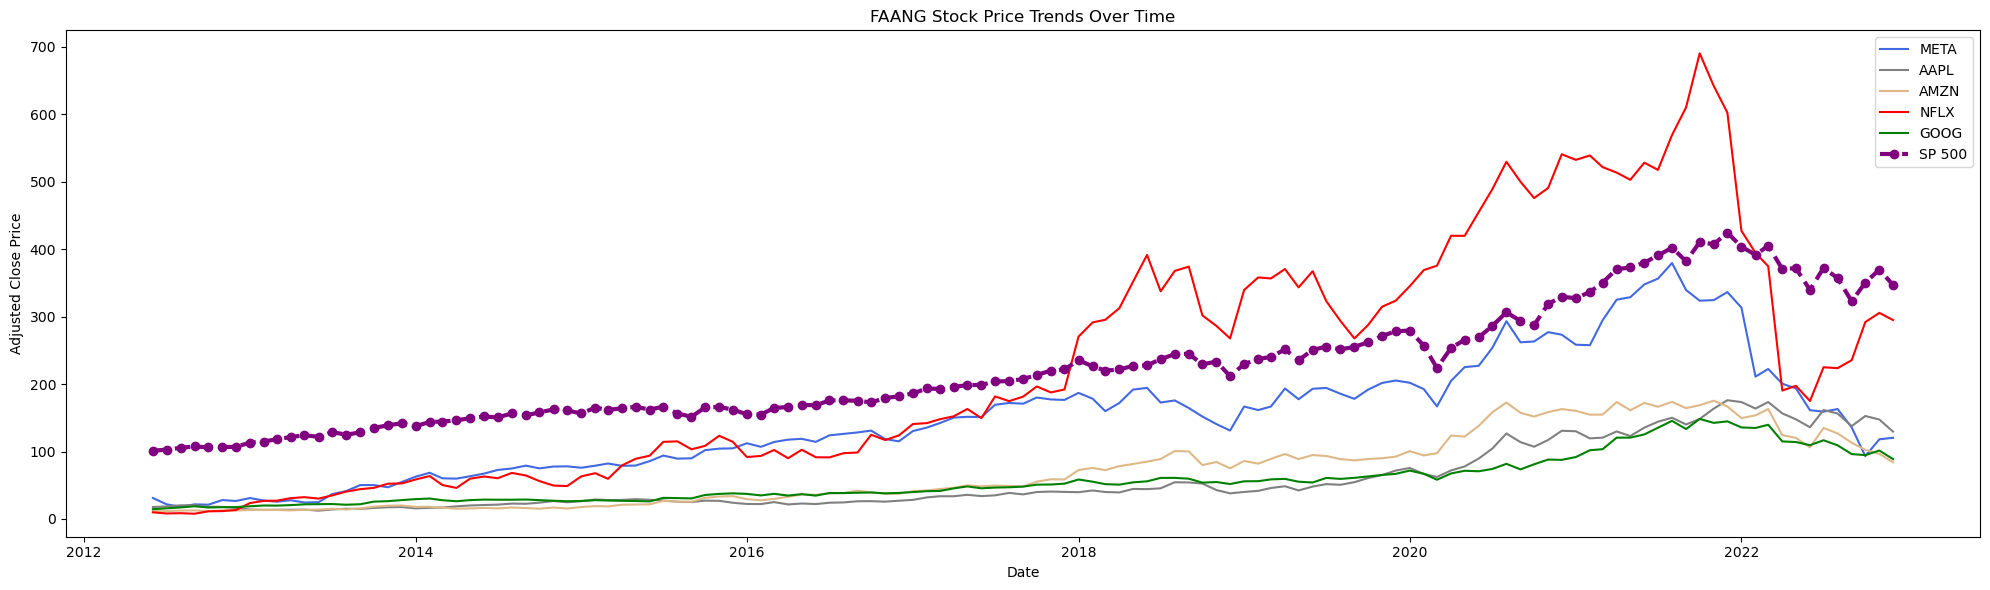

In [51]:
# plot price trends
fig, ax = plt.subplots(figsize=(20, 6))

ax.plot(meta.index, meta['adjclose'], label='META', color='royalblue')
ax.plot(apple.index, apple['adjclose'], label='AAPL', color='grey')
ax.plot(amazon.index, amazon['adjclose'], label='AMZN', color='burlywood')
ax.plot(netflix.index, netflix['adjclose'], label='NFLX', color='red')
ax.plot(google.index, google['adjclose'], label='GOOG', color='green')
ax.plot(voo.index, voo['adjclose'], label='SP 500', color='purple', linewidth=3, linestyle="--", marker="o")

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted Close Price')
ax.set_title('FAANG Stock Price Trends Over Time')

plt.legend()
plt.tight_layout()
plt.show()

The S&P 500 Index shows a consistent upward trend in prices over the analyzed time period.

In [52]:
meta_list= meta.loc[:,'adjclose'].tolist()
apple_list= apple.loc[:,'adjclose'].tolist()
amazon_list= amazon.loc[:,'adjclose'].tolist()
netfix_list= netflix.loc[:,'adjclose'].tolist()
google_list= google.loc[:,'adjclose'].tolist()
voo_list= voo.loc[:,'adjclose'].tolist()

In [54]:
correlation= pd.DataFrame({'META': meta_list,
                              'AAPL': apple_list,
                              'AMZN': amazon_list,
                              'NFLX': netfix_list,
                              'GOOG': google_list,
                              'SP500': voo_list })
correlation.head()

,META,AAPL,AMZN,NFLX,GOOG,SP500
0,31.100000,17.727377,11.4175,9.784286,14.447597,101.083015
1,21.709999,18.539679,11.6650,8.121429,15.765158,102.836525
2,18.059999,20.193424,12.4135,8.531429,17.063293,105.414360
3,21.660000,20.336830,12.7160,7.777143,18.792063,107.551682
4,21.110001,18.148584,11.6445,11.320000,16.943991,105.988686


In [55]:
correlation_matrix = correlation.corr()
correlation_matrix

,META,AAPL,AMZN,NFLX,GOOG,SP500
META,1.000000,0.772023,0.927805,0.935761,0.864531,0.874354
AAPL,0.772023,1.000000,0.901896,0.773382,0.961702,0.960198
AMZN,0.927805,0.901896,1.000000,0.950151,0.927072,0.942440
NFLX,0.935761,0.773382,0.950151,1.000000,0.837931,0.862373
GOOG,0.864531,0.961702,0.927072,0.837931,1.000000,0.983807
SP500,0.874354,0.960198,0.942440,0.862373,0.983807,1.000000


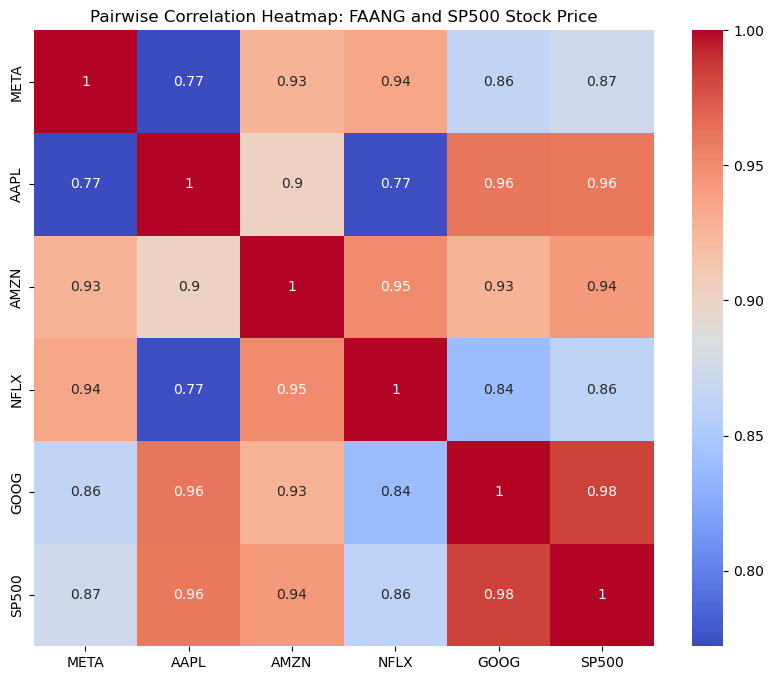

In [56]:
# Create the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.colorbar

plt.title('Pairwise Correlation Heatmap: FAANG and SP500 Stock Price')

plt.show()

The heatmap indicates a positive correlation between the price movements of the FAANG stocks and the S&P 500 Index, suggesting a close relationship between these two market benchmarks.